# Feature Engineering & Regularization

## Problem Set:
We can predict somewhat the length of '농어'.  
But still training data set is bigger than test data set  
In here, we can have more information of '농어' like  width.  
We have to use this feature well in order to predict the length of  '농어'.  
How we can solve this problem?  

## Solution(key):
multiple regression (ridge, lasso)  
featrue engineering

In [ ]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

Prepare data set

In [ ]:
# read csv file
df = pd.read_csv('https://bit.ly/perch_csv') 

# dataframe to numpy array
# Length, Heigth, Thickness
perch_input = df.to_numpy()

# show 10 perch inpit data
print("perch_input: ", perch_input[:10])

# perch target data
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

perch_input:  [[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]]


Split Data Set to train set and test set

In [ ]:
# Sata set split to train set and test set 
sli = train_test_split(perch_input, perch_weight, random_state=42)

# train data set
train_input = sli[0]
train_target = sli[2]

# test data set
test_input = sli[1]
test_target = sli[3]

#### Featrue engineering
Practice the PolynomialFeatures function

In [ ]:
#Example input data
poly_exam_input = [[2, 3]]

# Declaration
poly = PolynomialFeatures()

# Training
poly.fit(poly_exam_input)

# tranform
poly_exam_train_input = poly.transform(poly_exam_input)

# show tranfromed data
print("poly_exam_train_input: ", poly_exam_train_input)

# Notice: 1 value is bias 
# you can remove bias value as way of below
# PolynomialFeatures(include_bias=False)

poly_exam_train_input:  [[1. 2. 3. 4. 6. 9.]]


Apply to the real data set

In [ ]:
# Declaration
poly = PolynomialFeatures(include_bias=False)

# Training
poly.fit(train_input)

# transform
train_poly_input = poly.transform(train_input)
test_poly_input = poly.transform(test_input)

# 42 data, 9 feature 
print("Train Data shape: ", train_poly_input.shape)
# 14 Data, 9 featrues
print("Test  Data shape: ", test_poly_input.shape)

# how to make feature
# x0    
# x0^2  is Square(x0) 
# x0 x1 is x0 * x1
print("Feature_makeing: ", poly.get_feature_names())

Train Data shape:  (42, 9)
Test  Data shape:  (14, 9)
Feature_makeing:  ['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']


Multi-full Linear Regression

In [ ]:
# Declaration
lr = LinearRegression()

# training
lr.fit(train_poly_input, train_target)

# training score
score_train = lr.score(train_poly_input, train_target)
score_test  = lr.score(test_poly_input, test_target)

# Show score
print("Train Score: ", score_train)
print("Test  Score: ", score_test)

# Difference score
score_differ = score_train - score_test
print("Difference Score: ", score_differ)

Train Score:  0.9903183436982124
Test  Score:  0.9714559911594132
Difference Score:  0.0188623525387992


Add the more  features

In [ ]:
# Declaration
# degree is power of numbers  
poly = PolynomialFeatures(degree=5, include_bias=False)

# training
poly.fit(train_input)

# transform
train_poly_input = poly.transform(train_input)
test_poly_input = poly.transform(test_input)

# 42 Data, 55 featrues
print("Train Data shape: ", train_poly_input.shape)
# 14 Data, 55 featrues
print("Test  Data shape: ", test_poly_input.shape)

Train Data shape:  (42, 55)
Test  Data shape:  (14, 55)


####Multi-full Linear Regression
Too many features -> Overffiting

In [ ]:
# Declaration
lr = LinearRegression()

# training
lr.fit(train_poly_input, train_target)

# training score
score_train = lr.score(train_poly_input, train_target)
score_test  = lr.score(test_poly_input, test_target)

# Show score
print("Train Score: ", score_train) # oh! perfect socre
print("Test  Score: ", score_test) # but, test Score is -144 !!

# Difference score
score_differ = score_train - score_test
print("Difference Score: ", score_differ) # Overffiting

## Notice: 
# If train_input have too many features,  
# this model trained perfectly fitting  in train data set. 
# so, this model become the 'overffiting' in train data set.

Train Score:  0.9999999999991096
Test  Score:  -144.40579242335605
Difference Score:  145.40579242335517


#### Regularization
protect from 'Overfitting'  
by Standard Scaler

In [ ]:
# Declaration
ss = StandardScaler()

# Trainning
ss.fit(train_poly_input)

# Transform
train_scaled_input = ss.transform(train_poly_input)
test_scaled_input = ss.transform(test_poly_input)

In [ ]:
#Declaration
ridge = Ridge()

#
ridge.fit(train_scaled_input, train_target)

#
score_train = ridge.score(train_scaled_input, train_target)
score_test = ridge.score(test_scaled_input, test_target)

print("Train Score:", score_train)
print("Test  Score:", score_test) 

Train Score: 0.9896101671037343
Test  Score: 0.9790693977615398


In [ ]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)

  ridge.fit(train_scaled_input, train_target)

  train_score.append(ridge.score(train_scaled_input, train_target))
  test_score.append(ridge.score(test_scaled_input, test_target))

#### Find Best alpha value
$ \displaystyle x=-1, \log(10^{-1})$  
alpha $ \displaystyle = 10^{-1} = 0.1 $

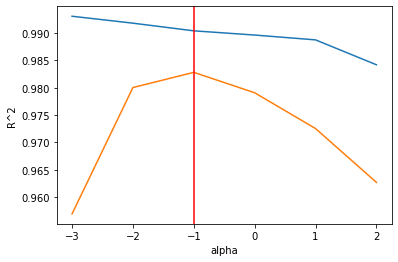

In [ ]:
# You can find the best alpha value as draw graph
alpha = 0.1

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

# x = -1 is best 
plt.axvline(x=np.log10(alpha), color="red")

plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

#### Ridge Regression

In [ ]:
# Declaration
ridge = Ridge(alpha=alpha)

# Training
ridge.fit(train_scaled_input, train_target)

# Score
score_train  = ridge.score(train_scaled_input, train_target)
score_test   = ridge.score(test_scaled_input, test_target)
score_differ = score_train - score_test

print("Score train  : ", score_train)
print("Score test   : ", score_test)
print("score differ : ", score_differ)

Score train  :  0.9903815817570366
Score test   :  0.9827976465386927
score differ :  0.007583935218343885


#### Lasso Regression

In [ ]:
# Declaration
lasso = Lasso()

# Training
lasso.fit(train_scaled_input, train_target)

# Score
score_train = lasso.score(train_scaled_input, train_target)
score_test  = lasso.score(test_scaled_input, test_target)
score_differ = score_train - score_test

print("Score Train  : ", score_train)
print("Score Test   : ", score_test)
print("Socre Differ : ", score_differ)


Score Train  :  0.9897898972080961
Score Test   :  0.9800593698421883
Socre Differ :  0.009730527365907737


In [ ]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  lasso = Lasso(alpha=alpha, max_iter=10000)

  lasso.fit(train_scaled_input, train_target)

  train_score.append(lasso.score(train_scaled_input, train_target))
  test_score.append(lasso.score(test_scaled_input, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


Find alpha

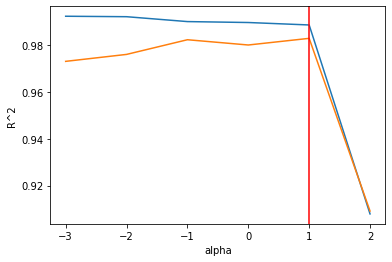

In [ ]:
# You can find the best alpha value as draw graph
# = log(10) = 1
alpha = 10 

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

# x = -1 is best 
plt.axvline(x=np.log10(alpha), color="red")

plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

Score

In [ ]:
lasso = Lasso(alpha=alpha)
lasso.fit(train_scaled_input, train_target)

score_train = lasso.score(train_scaled_input, train_target)
score_test  = lasso.score(test_scaled_input,  test_target)
score_differ = score_train - score_test

print("Score train  : ", score_train)
print("Score test   : ", score_test)
print("Score differ : ", score_differ)

Score train  :  0.9888067471131867
Score test   :  0.9824470598706695
Score differ :  0.006359687242517231


In [ ]:
zero_feature = np.sum(lasso.coef_ == 0)

# We set the 55 featrue in model.
# But lasso model only use 15 featrue.
print("Zero featrue: ", zero_feature)

Zero featrue:  40
